# Airbnb US Data Analysis 2023

### 1. Data Loading and Inspection:



In [25]:
import pandas as pd

In [41]:
#load the data
df = pd.read_csv('data/AB_US_2023.csv')
df.head()

/tmp/ipykernel_5137/3258287684.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/AB_US_2023.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [42]:
#check the data shape and types
print(df.shape)
df.dtypes

(232147, 18)


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
city                               object
dtype: object

<module 'matplotlib.pyplot' from '/home/codespace/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

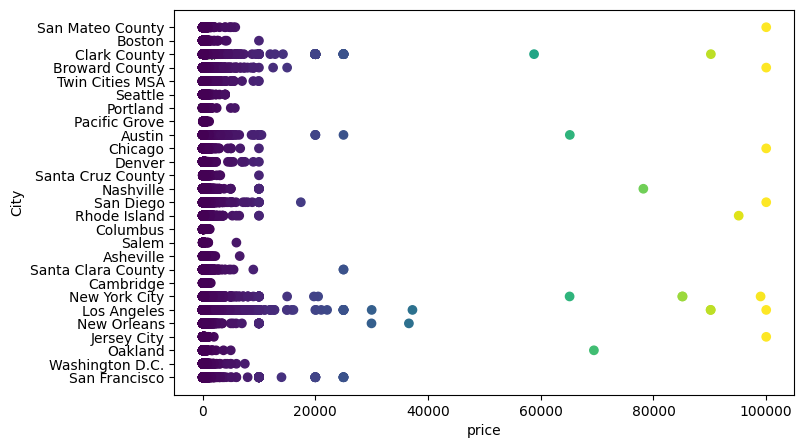

In [43]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np


#df = df[df['price'] < 10000]
df_X = df[['price', 'city', 'room_type']]

np1 = df_X.to_numpy()
plt.figure(figsize=(8, 5))
plt.scatter(np1[:,0], np1[:,1], c=np1[:,0], cmap='viridis')
plt.ylabel('City')
plt.xlabel('price')
plt

<module 'matplotlib.pyplot' from '/home/codespace/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

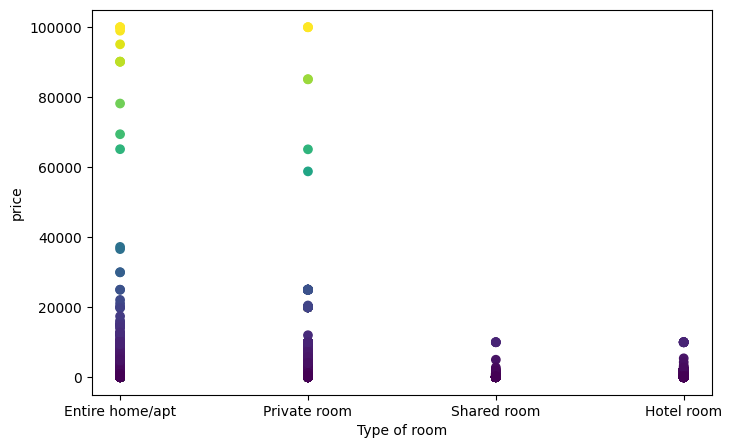

In [44]:
plt.figure(figsize=(8, 5))
plt.scatter(np1[:,2], np1[:,0], c=np1[:,0], cmap='viridis')
plt.xlabel('Type of room')
plt.ylabel('price')
plt

### Exploratory Data Analysis (EDA):

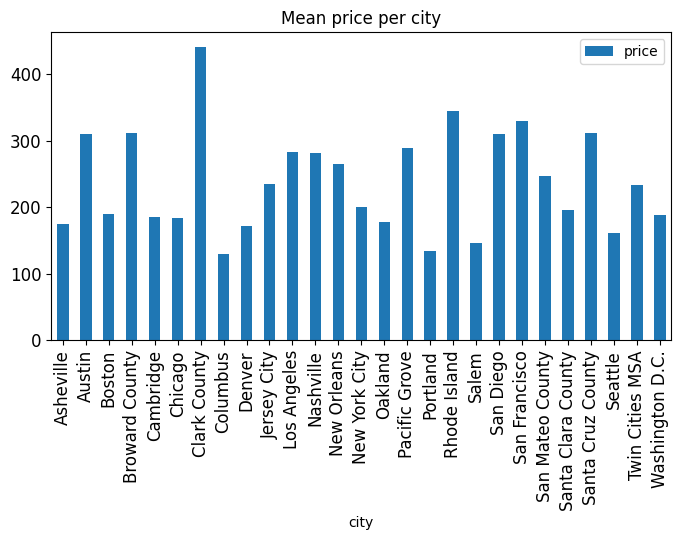

In [48]:
#calculate mean of price per city
df.groupby('city')['price'].mean()
plot = df.groupby('city')['price'].mean().plot(kind='bar', title ="Mean price per city", figsize=(8, 4), legend=True, fontsize=12)

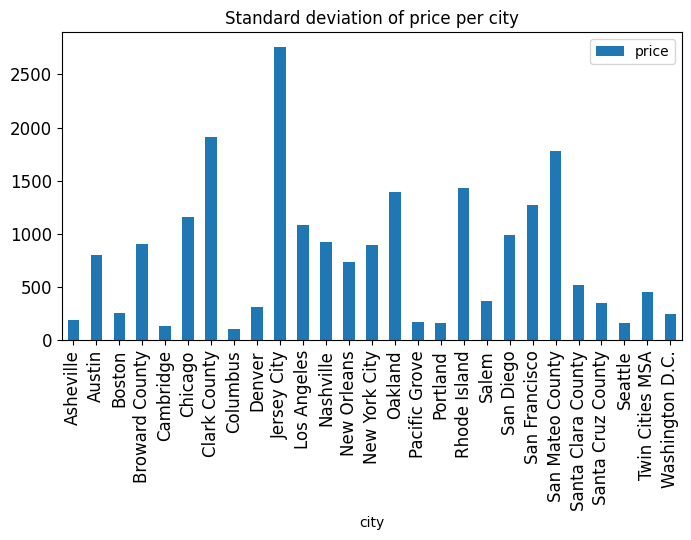

In [49]:
#calculate the standard deviation of price per city
df.groupby('city')['price'].std()
plot = df.groupby('city')['price'].std().plot(kind='bar', title ="Standard deviation of price per city", figsize=(8, 4), legend=True, fontsize=12)


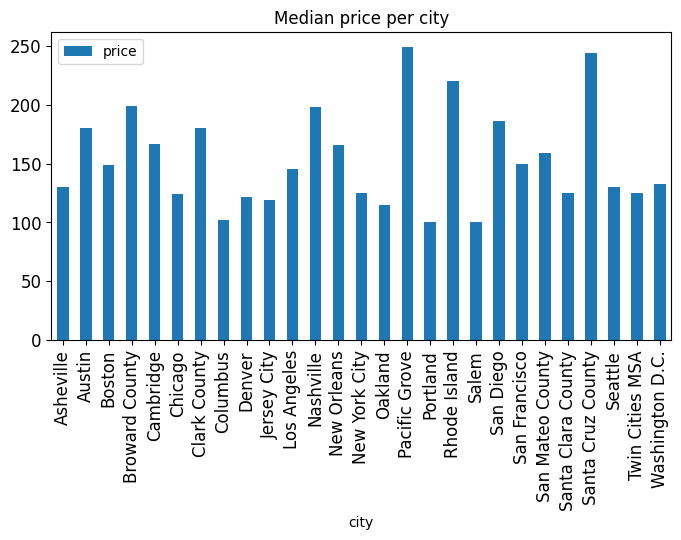

In [50]:
#calculate the median of price per city
df.groupby('city')['price'].median()
plot = df.groupby('city')['price'].median().plot(kind='bar', title ="Median price per city", figsize=(8, 4), legend=True, fontsize=12)

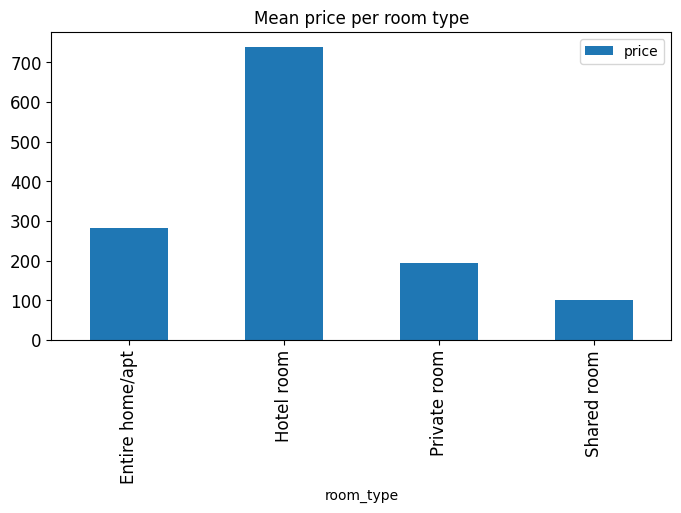

In [52]:
#calculate the mean of price per room type
df.groupby('room_type')['price'].mean()
plot = df.groupby('room_type')['price'].mean().plot(kind='bar', title ="Mean price per room type", figsize=(8, 4), legend=True, fontsize=12)

<Axes: >

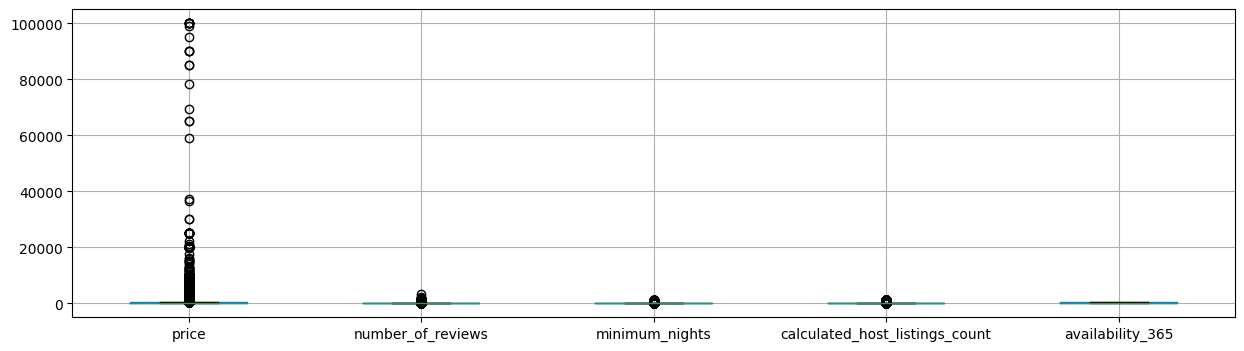

In [64]:
#Box plots to identify outliers in numerical columns.
df.boxplot(column=['price', 'number_of_reviews', 'minimum_nights', 'calculated_host_listings_count', 'availability_365'], figsize=(15, 4))